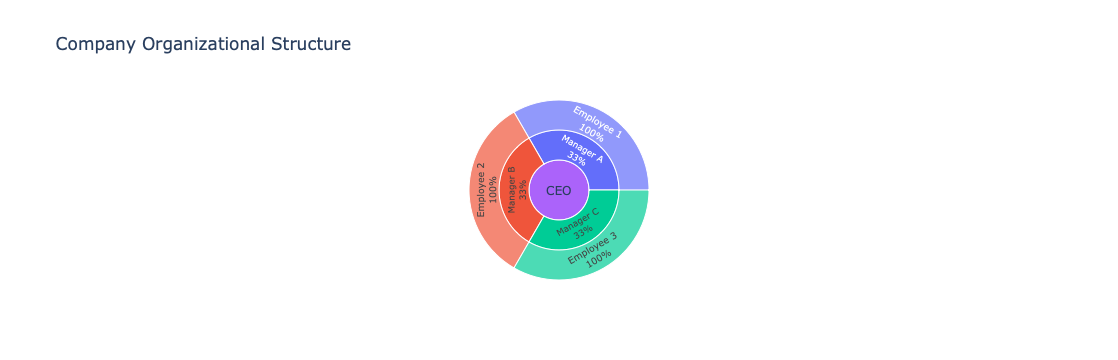

In [16]:
import pandas as pd
import plotly.express as px
# Load data
df = pd.read_csv("org_hierarchy.csv")
# Sunburst chart for hierarchy
fig = px.sunburst(df,
path=['Level1', 'Level2', 'Level3'],
title="Company Organizational Structure",
color='Level2')
fig.update_traces(textinfo='label+percent parent')
fig.show()

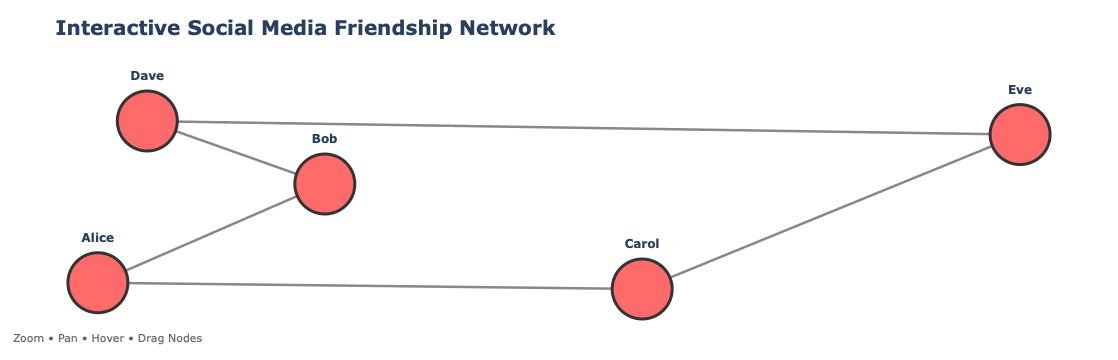

In [9]:
# --------------------------------------------------------------
# Assignment-05: Q2 - Social Media Friendship Network
# --------------------------------------------------------------
import pandas as pd
import plotly.graph_objects as go
import networkx as nx

# Load social connections
df = pd.read_csv("social_connections.csv")

# Create directed graph
G = nx.from_pandas_edgelist(
    df, source='Source', target='Target',
    edge_attr='Relationship', create_using=nx.DiGraph()
)

# Compute layout
pos = nx.spring_layout(G, k=1.5, iterations=70, seed=42)

# === Nodes ===
node_x = [pos[n][0] for n in G.nodes()]
node_y = [pos[n][1] for n in G.nodes()]
node_text = [f"<b>{n}</b>" for n in G.nodes()]

# === Edges ===
edge_x, edge_y, edge_hover = [], [], []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_hover.append(
        f"<b>{edge[0]} → {edge[1]}</b><br>"
        f"Relationship: <b>{edge[2]['Relationship']}</b>"
    )

# Edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2.5, color='#888'),
    hoverinfo='text',
    text=edge_hover,
    mode='lines'
)

# Node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,
    textposition="top center",
    marker=dict(
        size=60,
        color='#FF6B6B',
        line=dict(width=3, color='#333')
    ),
    hovertemplate="%{text}<extra></extra>"
)

# Create figure
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="<b>Interactive Social Media Friendship Network</b>",
        titlefont_size=20,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=70),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        template="plotly_white",
        annotations=[dict(
            text="Zoom • Pan • Hover • Drag Nodes",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.02,
            font=dict(color="#666", size=11)
        )]
    )
)

fig.update_layout(dragmode='pan')
fig.show()
fig.write_html("q2_social_network_graph.html")

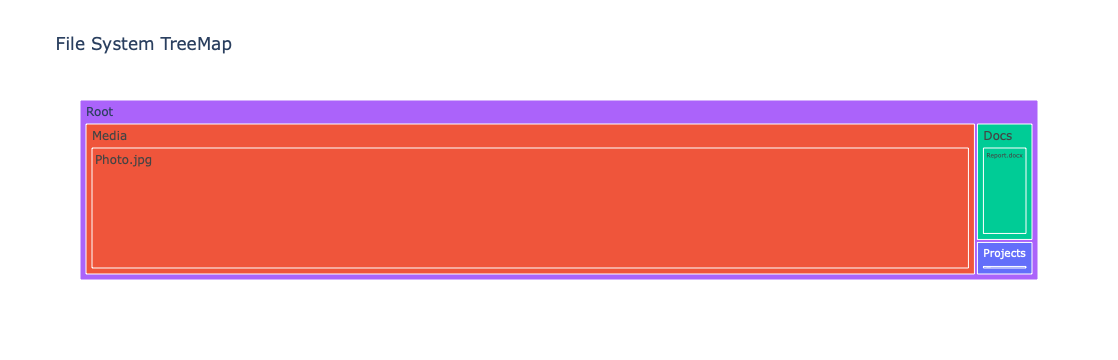

In [5]:

import pandas as pd
import plotly.express as px
df = pd.read_csv("filestructure.csv")
fig = px.treemap(df,
path=['Folder', 'SubFolder', 'File'],
values='Size',
color='SubFolder',
title="File System TreeMap")
fig.show()

In [14]:
pip install plotly pandas networkx dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 537.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [dash]1/2 [dash]
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [19]:
# app.py
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load data
df = pd.read_csv("business_sales.csv")

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Business Insights Dashboard", style={'textAlign': 'center', 'color': '#2c3e50'}),

    html.Div([
        html.Label("Select Region:"),
        dcc.Dropdown(
            id='region-filter',
            options=[{'label': r, 'value': r} for r in df['Region'].unique()],
            value=None,
            multi=True,
            placeholder="All Regions"
        ),
    ], style={'width': '48%', 'display': 'inline-block', 'padding': '10px'}),

    html.Div([
        html.Label("Select Months:"),
        dcc.Dropdown(
            id='month-filter',
            options=[{'label': m, 'value': m} for m in df['Month'].unique()],
            value=df['Month'].tolist(),
            multi=True,
            placeholder="All Months"
        ),
    ], style={'width': '48%', 'display': 'inline-block', 'padding': '10px'}),

    html.Hr(),

    # Row 1: Total Sales by Region (Bar)
    html.Div([
        dcc.Graph(id='sales-by-region')
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Row 1: Profit by Region (Bar)
    html.Div([
        dcc.Graph(id='profit-by-region')
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Row 2: Monthly Revenue Trend (Line)
    html.Div([
        dcc.Graph(id='monthly-trend')
    ], style={'width': '100%', 'padding': '20px 0'})
])

# Callback to update all graphs
@app.callback(
    [Output('sales-by-region', 'figure'),
     Output('profit-by-region', 'figure'),
     Output('monthly-trend', 'figure')],
    [Input('region-filter', 'value'),
     Input('month-filter', 'value')]
)
def update_charts(selected_regions, selected_months):
    # Filter data
    filtered_df = df.copy()
    if selected_regions and len(selected_regions) > 0:
        filtered_df = filtered_df[filtered_df['Region'].isin(selected_regions)]
    if selected_months and len(selected_months) > 0:
        filtered_df = filtered_df[filtered_df['Month'].isin(selected_months)]

    # Chart 1: Total Sales by Region
    sales_fig = px.bar(
        filtered_df.groupby('Region')['Sales'].sum().reset_index(),
        x='Region', y='Sales',
        title="Total Sales by Region",
        color='Region',
        text='Sales',
        labels={'Sales': 'Total Sales ($)'}
    )
    sales_fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    sales_fig.update_layout(showlegend=False)

    # Chart 2: Total Profit by Region
    profit_fig = px.bar(
        filtered_df.groupby('Region')['Profit'].sum().reset_index(),
        x='Region', y='Profit',
        title="Total Profit by Region",
        color='Region',
        text='Profit',
        labels={'Profit': 'Total Profit ($)'}
    )
    profit_fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    profit_fig.update_layout(showlegend=False)

    # Chart 3: Monthly Revenue Trend
    trend_df = filtered_df.copy()
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
    trend_df['Month'] = pd.Categorical(trend_df['Month'], categories=month_order, ordered=True)
    trend_df = trend_df.sort_values('Month')

    trend_fig = px.line(
        trend_df.groupby(['Month', 'Region'])['Sales'].sum().reset_index(),
        x='Month', y='Sales', color='Region',
        title="Monthly Revenue Trend",
        markers=True,
        labels={'Sales': 'Monthly Sales ($)'}
    )
    trend_fig.update_layout(hovermode='x unified')

    return sales_fig, profit_fig, trend_fig


# FIXED LINE BELOW
if __name__ == '__main__':
    app.run(debug=True)

/var/folders/4h/8_b3mbdn13qdt72sslc9nfdh0000gn/T/ipykernel_33136/3713156959.py:103: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



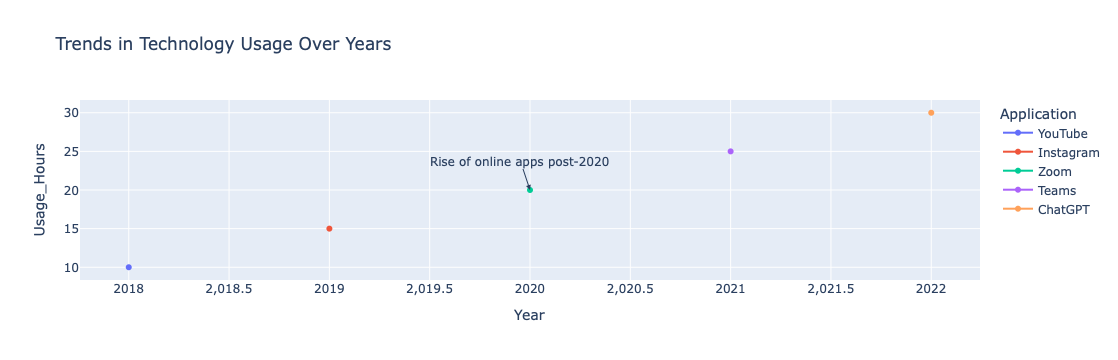

In [20]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("tech_usage.csv")
fig = px.line(df, x="Year", y="Usage_Hours", color="Application",
title="Trends in Technology Usage Over Years",
markers=True)
fig.add_annotation(text="Rise of online apps post-2020",
x=2020, y=20, showarrow=True, arrowhead=2)
fig.show()

In [29]:
pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [dtreeviz]
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
df = pd.read_csv("email_network.csv")
G = nx.from_pandas_edgelist(df, 'Sender', 'Receiver')
deg = dict(G.degree())
centrality = nx.degree_centrality(G)
print("Degree Distribution:", deg)
print("Centrality:", centrality)

Degree Distribution: {'John': 2, 'Mary': 2, 'Alex': 2}
Centrality: {'John': 1.0, 'Mary': 1.0, 'Alex': 1.0}


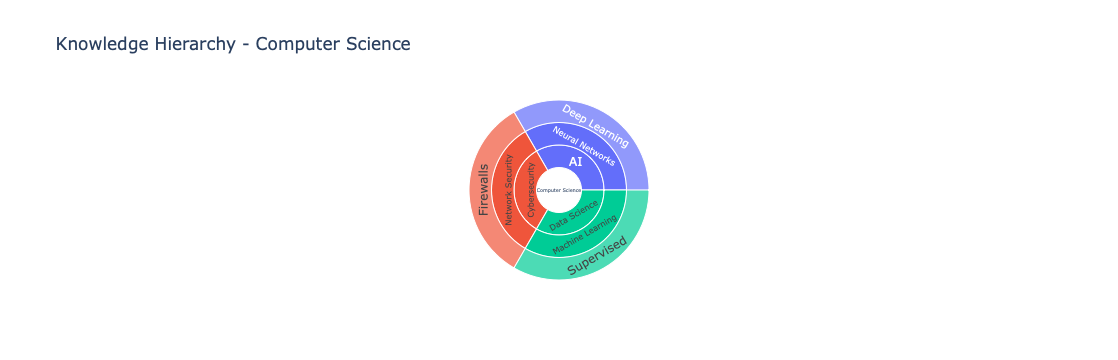

In [33]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("taxonomy.csv")
fig = px.sunburst(df,
path=['Domain', 'Category', 'Topic', 'Subtopic'],
title="Knowledge Hierarchy - Computer Science")
fig.show()

2025-11-13 21:38:04.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 21:38:04.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 21:38:04.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 21:38:04.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 21:38:04.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 21:38:04.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 21:38:04.955 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 21:38:04.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

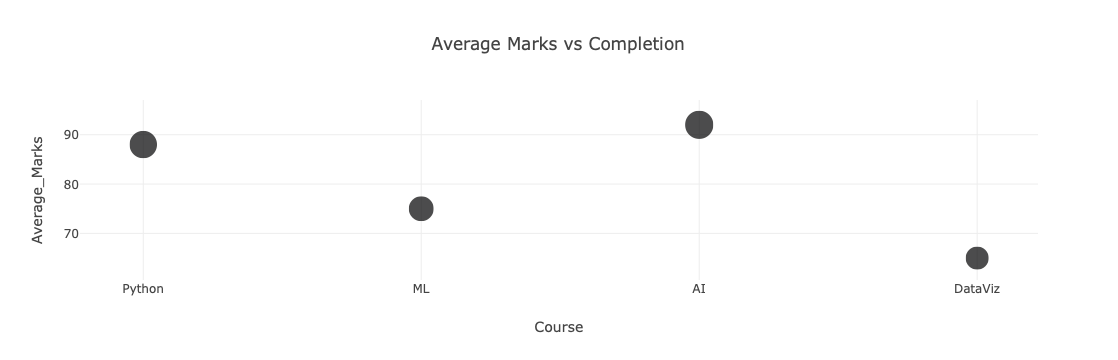

In [40]:
import streamlit as st
import pandas as pd
import plotly.express as px
df = pd.read_csv("learning_progress.csv")
st.title("Online Learning Analytics Dashboard")
fig1 = px.bar(df, x="Student", y="Completion_%", color="Course", title="Course Completion Rate")
st.plotly_chart(fig1)
fig2 = px.scatter(df, x="Course", y="Average_Marks", size="Completion_%",
title="Average Marks vs Completion")
st.plotly_chart(fig2)
fig2.show()

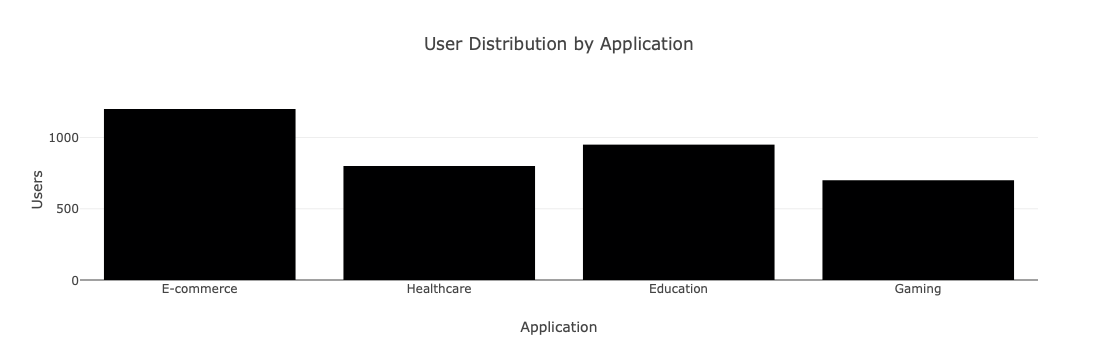

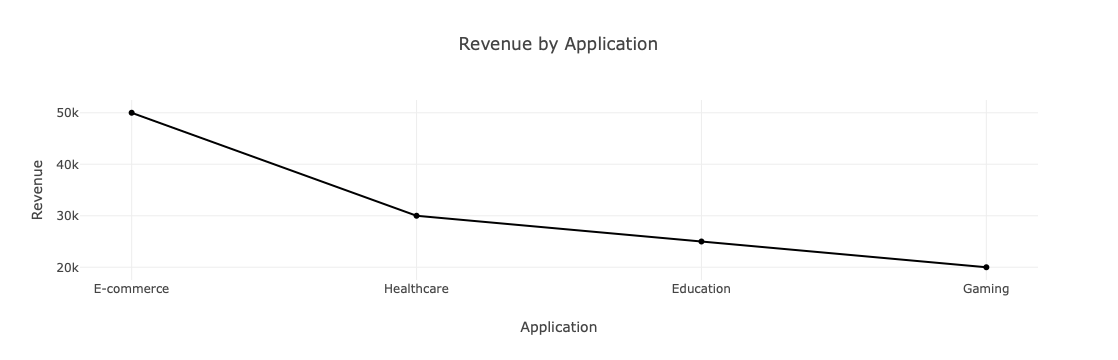

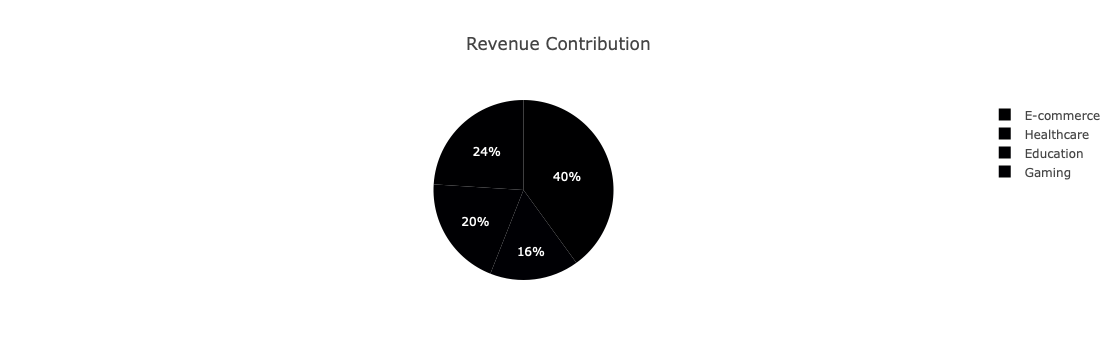

In [39]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("project_dataset.csv")
# Bar chart - Users
fig1 = px.bar(df, x="Application", y="Users", title="User Distribution by Application")
fig1.show()
# Line chart - Revenue growth
fig2 = px.line(df, x="Application", y="Revenue", markers=True, title="Revenue by Application")
fig2.show()
# Pie chart - Revenue share
fig3 = px.pie(df, values="Revenue", names="Application", title="Revenue Contribution")
fig3.show()